In [36]:
import pickle

train_data, test_data = None, None
with open("../data/train_data.pickle", "rb") as f:
    train_data = pickle.load(f)
with open("../data/test_data.pickle", "rb") as f:
    test_data = pickle.load(f)

In [37]:
x_train = train_data['train_texts']
y_train = train_data['train_labels']

x_test = test_data['test_texts']
y_test = test_data['test_labels']

In [38]:
%%time

from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
word_vec = TfidfVectorizer(min_df=5, ngram_range=(1,2), lowercase=False)
char_vec = TfidfVectorizer(min_df=5, ngram_range=(2,3), lowercase=False)

fu = FeatureUnion([
    ('word', word_vec),
    ('char', char_vec)
])

X_train = fu.fit_transform(x_train)

CPU times: user 4.57 s, sys: 120 ms, total: 4.69 s
Wall time: 4.69 s


In [39]:
X_train.shape

(50, 28206)

In [40]:
X_test = fu.transform(x_test)

In [41]:
from sklearn.svm import LinearSVC

svm = LinearSVC()

In [42]:
%%time

svm.fit(X_train, y_train)

CPU times: user 935 ms, sys: 12 ms, total: 947 ms
Wall time: 946 ms


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [43]:
preds = svm.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.462

In [44]:
def get_chunks(l, n):
    n = max(1, n)
    return [l[i:i+n] for i in range(0, len(l), n)]

In [45]:
print(len(x_test))
print(len(y_test))

2500
2500


In [46]:
from statistics import mean
word_counts = [text.count(" ") for text in x_test]
mean(word_counts)

182.5416

In [47]:
# 182 words is quite short
# Try to join 5 tests texts together
longer_test_texts = get_chunks(x_test, 5)
longer_test_labels = get_chunks(y_test, 5)

In [48]:
all([len(set(x)) == 1 for x in longer_test_labels])  # Make sure that all combined labels are the same

True

In [49]:
longer_test_texts = ['\n'.join(chunk) for chunk in longer_test_texts]

In [50]:
longer_test_labels = [chunk[0] for chunk in longer_test_labels]

In [51]:
len(longer_test_texts)

500

In [52]:
X_test_longer = fu.transform(longer_test_texts)

In [53]:
preds = svm.predict(X_test_longer)

In [54]:
accuracy_score(longer_test_labels, preds)

0.908

In [22]:
from sklearn.metrics import confusion_matrix

In [55]:
from sklearn.metrics import f1_score
f1_score(longer_test_labels, preds, average='macro')

0.9003983905994943

In [23]:
# !pip install matplotlib
import matplotlib.pyplot as plt


In [24]:
cm = confusion_matrix(longer_test_labels, preds)

In [25]:
cm

array([[ 7,  0,  1, ...,  0,  0,  0],
       [ 0, 10,  0, ...,  0,  0,  0],
       [ 0,  0, 10, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  9,  0,  0],
       [ 0,  0,  0, ...,  0, 10,  0],
       [ 0,  0,  0, ...,  0,  0, 10]])

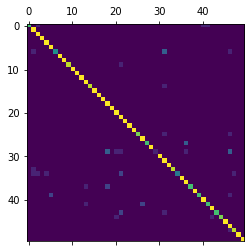

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(longer_test_labels, preds))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10
           2       0.83      1.00      0.91        10
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10
           5       0.83      1.00      0.91        10
           6       1.00      0.50      0.67        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      0.90      0.95        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       0.83      1.00      0.91        10
          14       1.00      0.90      0.95        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00    